# Generate GeoJSON from Natural Earth Data

## Install Dependencies

```
pip install geopandas shapely matplotlib
```

## Download Data

Download datasets (_Admin 0 - Countries_ in [1:10](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/), and _Admin 1 – States, Provinces_ in 1:10 and [1:50](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/)) from Natural Earch Data:

In [29]:
import os
import requests

data_dir = os.path.expanduser("~/Downloads")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

def download_files(skip_existing=True):
    for url in [
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip",
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip",
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip"
    ]:
        file_name = url.split('/')[-1]
        full_file_name = f'{data_dir}/{file_name}'
        with requests.get(
            url,
            headers={
                "accept-encoding": "gzip, deflate, br",
                "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
            },
            stream=True,
        ) as res:
            file_size = int(res.headers['content-length'])
            if res.status_code != 200:
                print("Error downloading files. Please open the URL to download them from browser manually.")
                break
            if (
                skip_existing and
                os.path.exists(full_file_name) and
                file_size == os.path.getsize(full_file_name)
            ):
                print(f"Skip {file_name} because it already exists")
                continue
            print(f"Downloading {file_name}... \r", end="")
            with open(full_file_name, "wb") as fh:
                fh.write(res.content)
    print("Done.                                                               ")

download_files(skip_existing=True)

Skip ne_10m_admin_0_countries.zip because it already exists
Skip ne_10m_admin_1_states_provinces.zip because it already exists
Skip ne_50m_admin_1_states_provinces.zip because it already exists
Done.                                                               


In [30]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely

df_admin0_10m = gpd.read_file(f"{data_dir}/ne_10m_admin_0_countries.zip")
df_10m = gpd.read_file(f"{data_dir}/ne_10m_admin_1_states_provinces.zip")
df_50m = gpd.read_file(f"{data_dir}/ne_50m_admin_1_states_provinces.zip")

# Download and load the GeoJSON file for India
india_geojson_url = "https://github.com/geohacker/india/raw/bcb920c7d3c686f01d085f7661c9ba89bf9bf65e/state/india_state_kashmir_ladakh.geojson"

try:
    india_gdf = gpd.read_file(india_geojson_url)
    print("GeoJSON file for India downloaded and loaded successfully.")
except Exception as e:
    print(f"Unable to download or load the GeoJSON file for India. Error: {str(e)}")
    print("Please download the file from the URL and try again.")

GeoJSON file for India downloaded and loaded successfully.


In [31]:
df_50m.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [32]:
df_admin0_10m.columns = df_admin0_10m.columns.str.lower()
df_admin0_10m.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_tr', 'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it',
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'geometry'],
      dtype='object', length=169)

In [33]:
df_50m.groupby('admin').count()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
admin,,,,,,,,,,,,,,,,,,,,,
Australia,9,9,9,9,9,0,9,9,9,0,...,0,0,0,0,0,0,0,0,0,9
Brazil,27,27,27,27,27,0,27,27,27,13,...,0,0,0,0,0,0,0,0,0,27
Canada,13,13,13,13,13,13,13,13,13,9,...,0,0,0,0,0,0,0,0,0,13
China,31,31,31,31,31,0,31,31,31,30,...,0,0,0,0,0,0,0,0,0,31
India,36,36,36,36,36,0,36,36,36,13,...,0,0,0,0,0,0,0,0,0,36
Indonesia,33,33,33,33,33,0,33,33,33,30,...,0,0,0,0,0,0,0,0,0,33
Russia,85,85,85,85,85,1,85,85,85,84,...,0,0,0,0,0,0,0,0,0,85
South Africa,9,9,9,9,9,0,9,9,9,9,...,0,0,0,0,0,0,0,0,0,9
United States of America,51,51,51,51,51,51,51,51,51,51,...,0,0,0,0,0,0,0,0,0,51


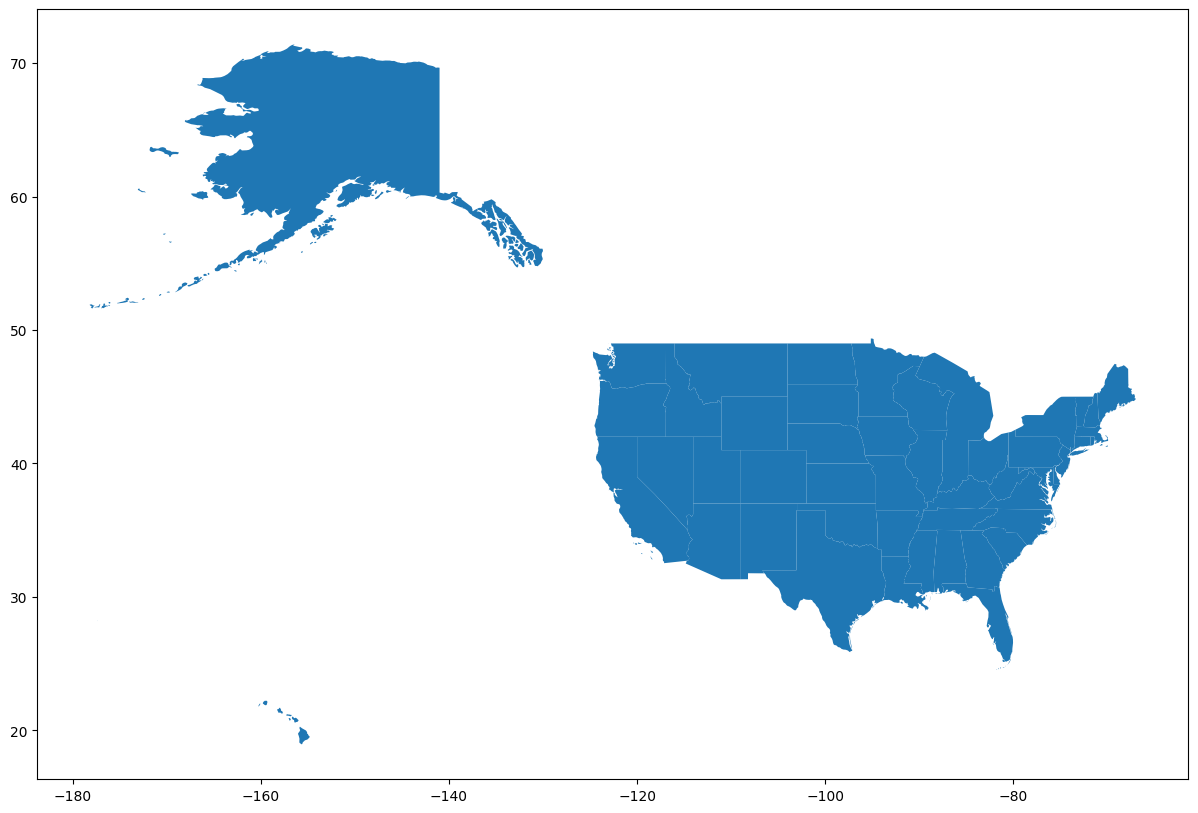

<AxesSubplot: >

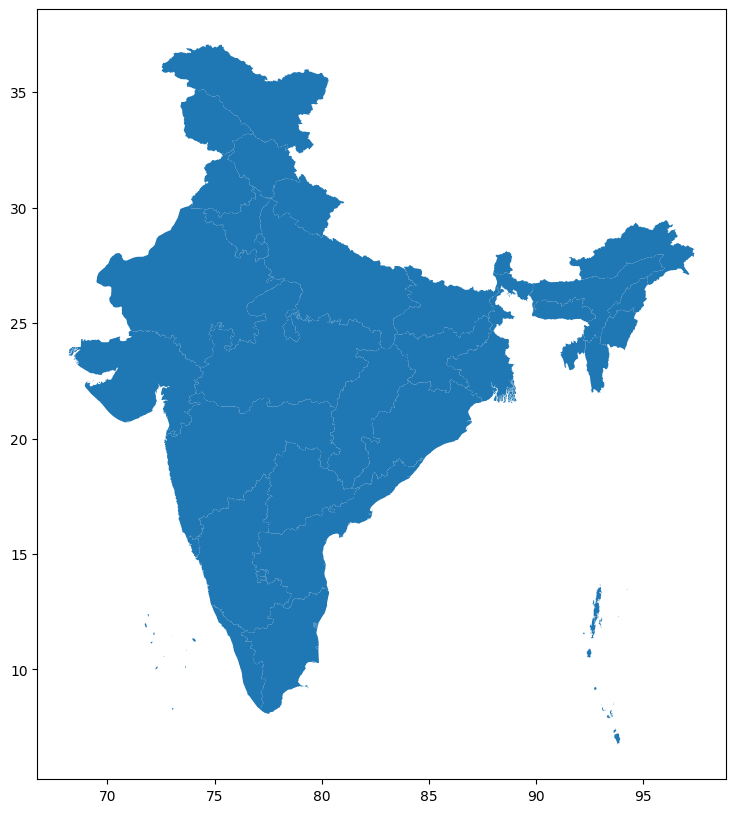

In [34]:
df_50m[df_50m.adm0_a3 == 'USA'].plot(figsize=(20,10))
plt.show()
india_gdf.plot(figsize=(20, 10))

Use 1:50m geometry for some large countries:

In [35]:
df_50m['admin'].unique()

array(['Australia', 'Brazil', 'Canada', 'United States of America',
       'China', 'India', 'Indonesia', 'Russia', 'South Africa'],
      dtype=object)

In [36]:
import pandas as pd

df = pd.concat([df_10m[~df_10m['admin'].isin(df_50m['admin'].unique())], df_50m])

## Adjust the Maps

<span style="color: red; font-size: 1.5em">TO SUPPORT NEW COUNTRIES, ADD COUNTRY NAME BELOW</span>

In [37]:
# Country names used in file names
countries = [
  'afghanistan',
  'albania',
  'algeria',
  'argentina',
  'australia',
  'austria',
  'belgium',
  'bolivia',
  'brazil',
  'bulgaria',
  'burundi',
  'canada',
  'chile',
  'china',
  'colombia',
  'costa rica',
  'cuba',
  'cyprus',
  'denmark',
  'dominican republic',
  'ecuador',
  'egypt',
  'el salvador',
  'estonia',
  'ethiopia',
  'france',
  'france_regions', # this one is custom - see below
  'finland',
  'germany',
  'guatemala',
  'haiti',
  'honduras',
  'iceland',
  'india',
  'indonesia',
  'iran',
  'italy',
  'italy_regions', # this one is custom - see below
  'japan',
  'jordan',
  'kazakhstan',
  'kenya',
  'korea',
  'kuwait',
  'kyrgyzstan',
  'latvia',
  'liechtenstein',
  'lithuania',
  'malaysia',
  'mexico',
  'morocco',
  'myanmar',
  'netherlands',
  'nicaragua',
  'nigeria',
  'norway',
  'oman',
  'pakistan',
  'panama',
  'papua new guinea',
  'paraguay',
  'peru',
  'philippines',
  'portugal',
  'poland',
  'puerto rico',
  'qatar',
  'russia',
  'rwanda',
  'saint barthelemy',
  'saint martin',
  'saudi arabia',
  'singapore',
  'slovenia',
  'spain',
  'sri lanka',
  'sweden',
  'switzerland',
  'syria',
  'tajikistan',
  'tanzania',
  'thailand',
  'timorleste',
  'turkey',
  'turkmenistan',
  'uganda',
  'uk',
  'ukraine',
  'united arab emirates',
  'uruguay',
  'usa',
  'uzbekistan',
  'venezuela',
  'vietnam',
  'zambia',
]

# country name used in dataset
country_name_aliases = {
    "uk": "united kingdom",
    "usa": "united states of america",
    "korea": "south korea",
    "timorleste": "east timor",
    "tanzania": "united republic of tanzania",
}

# CSV files that exist specifically on the repo, rather than in the dataset
custom_countries = [
  #'france_regions',
  'italy_regions',
]

# Make sure all country names are covered:
invalid_countries = [x for x in countries if (country_name_aliases.get(x, x) not in df["admin"].str.lower().unique()) and (x not in custom_countries)]

if invalid_countries:
  print(f"Following country names are not valid: {invalid_countries}")

Following country names are not valid: ['france_regions']


Preview all countries:

/var/folders/lc/0hq8dvlj5c7_g_fzpmgclh540000gn/T/ipykernel_51687/1621097802.py:21: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  get_gdf(country).plot(ax=ax)


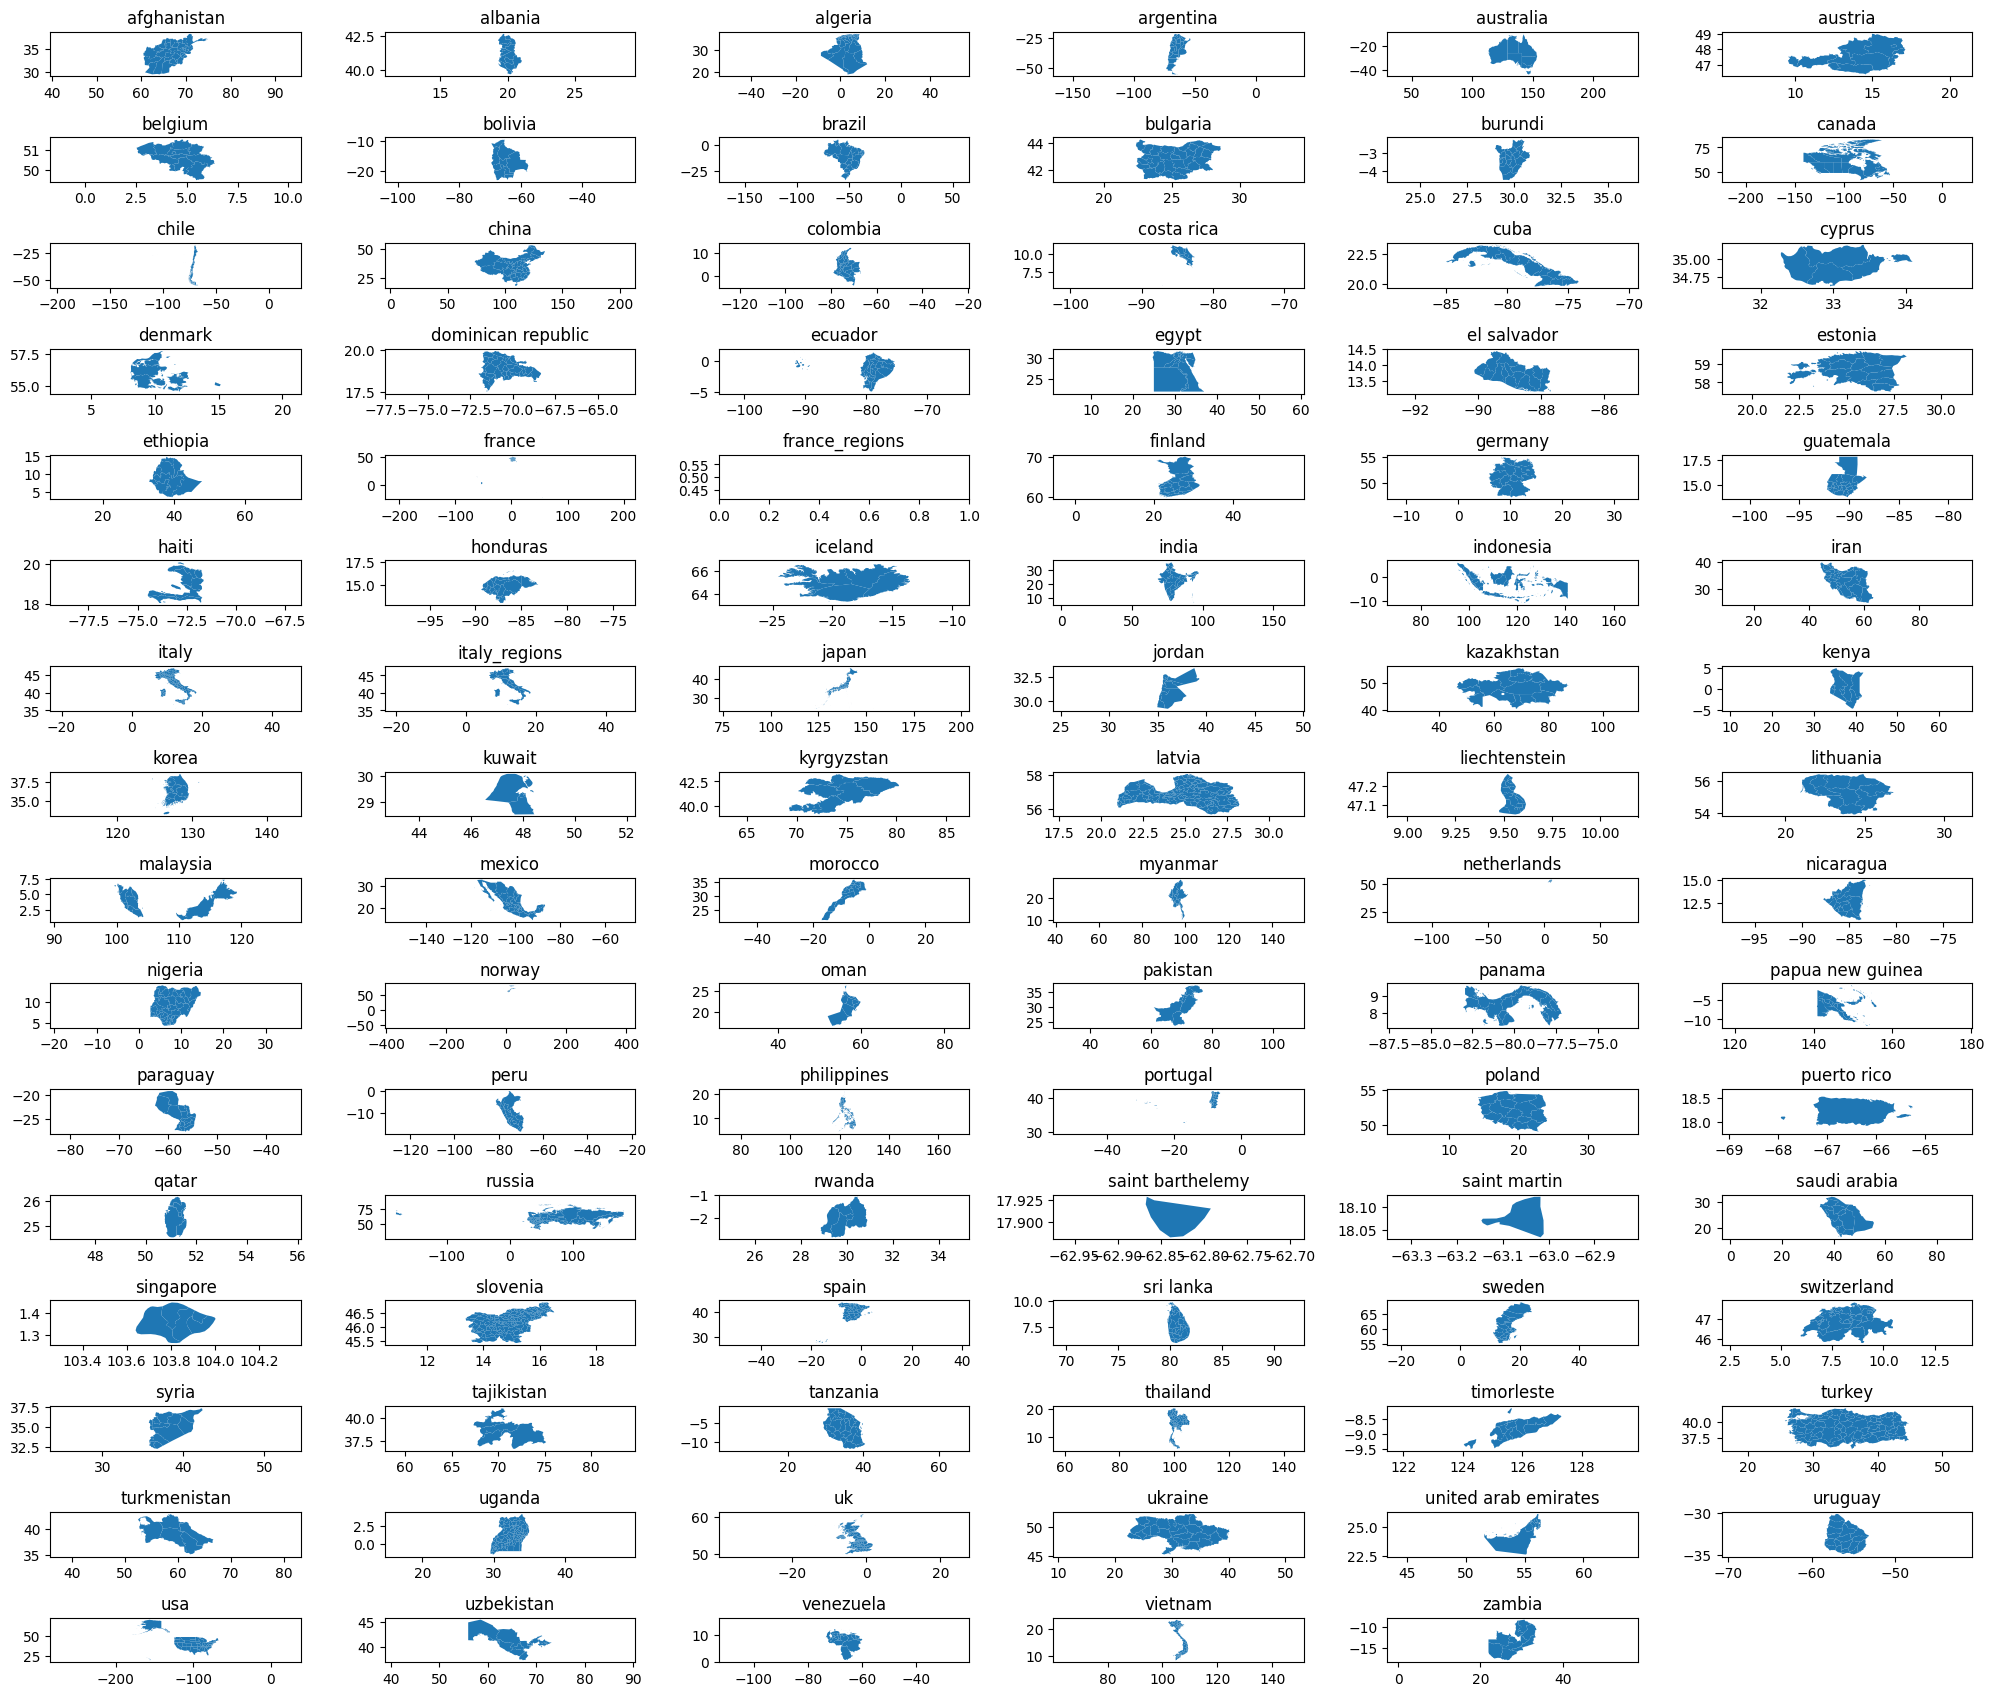

In [38]:
import geopandas as gpd

alt_maps = dict()

def get_gdf(country):
    country_alias = country_name_aliases.get(country, country)
    if country in alt_maps:
        gdf = alt_maps[country]
    elif country in custom_countries:
        gdf = gpd.read_file(f'../src/countries_custom/{country}.geojson')
    else:
        gdf = df[df["admin"].str.lower() == country_alias]
    return gdf.copy()

def plot_all_countries():
    plt.figure(figsize=(20, 20))

    for i, country in enumerate(countries):
        # create subplot axes in a 3x3 grid
        ax = plt.subplot(len(countries) // 5, 6, i + 1) # nrows, ncols, axes position
        get_gdf(country).plot(ax=ax)
        ax.set_title(country)
        ax.set_aspect('equal', adjustable='datalim')

    plt.tight_layout()
    plt.show()

plot_all_countries()

### Handle countries with flying islands

#### USA

For countries with flying islands, we need to move the islands closer to the mainland.

<AxesSubplot: >

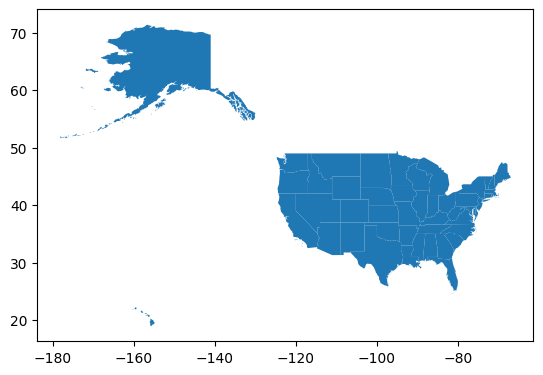

In [39]:
usa = df[df['adm0_a3'] == 'USA']
usa.plot()

<AxesSubplot: >

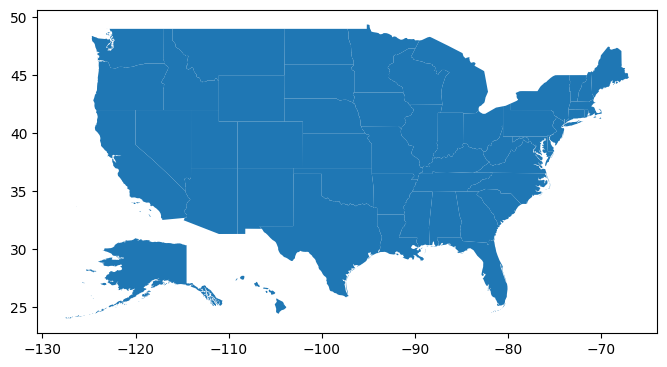

In [40]:
def reposition(df, idx, xoff=None, yoff=None, xscale=None, yscale=None, simplify=None):

    def move_and_scale(series):
        if xoff or yoff:
            series = shapely.affinity.translate(series, xoff or 0, yoff or 0)
        if xscale or yscale:
            series = shapely.affinity.scale(series, xscale or 1, yscale or 1)
        if simplify:
            series = series.simplify(simplify, preserve_topology=False)
        return series

    df.loc[idx, 'geometry'] = df.loc[idx, 'geometry'].apply(move_and_scale)


usa_copy = usa.copy()
reposition(usa_copy, usa.name == 'Hawaii', 51, 5.5)
reposition(usa_copy, usa.name == 'Alaska', 35, -34, 0.35, 0.35)

usa_copy.plot(figsize=(8,8))

#### China

China claims sovereign over Taiwan. For disputed territories, we respect each country and give them what they want.

In addition, Hong Kong and Macau should also be included in a China map.

In [41]:
# Chinese Special Administrative Regions
china_sars = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Taiwan', 'Hong Kong', 'Macau']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
china_sars = china_sars.merge(pd.DataFrame(
    data={
        "name_en": ["Taiwan", "Hong Kong", "Macau"],
        "name_zh": ["中国台湾", "香港特别行政区", "澳门特别行政区"],
        "iso_3166_2": ["CN-71", "CN-91", "CN-92"],
    },
), on="name_en", how="left")
china_sars

,featurecla,scalerank,labelrank,sov_a3,type,admin,adm0_a3,gu_a3,name,abbrev,...,name_sv,name_tr,name_uk,name_ur,name_vi,name_zh_x,name_zht,geometry,name_zh_y,iso_3166_2
0,Admin-0 country,0,4,CH1,Country,Hong Kong S.A.R.,HKG,HKG,Hong Kong,H.K.,...,Hongkong,Hong Kong,Гонконг,ہانگ کانگ,Hồng Kông,香港,香港,"MULTIPOLYGON (((114.22983 22.55581, 114.23471 ...",香港特别行政区,CN-91
1,Admin-0 country,0,3,TWN,Sovereign country,Taiwan,TWN,TWN,Taiwan,Taiwan,...,Taiwan,Çin Cumhuriyeti,Республіка Китай,تائیوان,Đài Loan,中华民国,中華民國,"MULTIPOLYGON (((121.90577 24.95010, 121.83473 ...",中国台湾,CN-71
2,Admin-0 country,0,4,CH1,Country,Macao S.A.R,MAC,MAC,Macao,Mac.,...,Macao,Makao,Аоминь,مکاؤ,Ma Cao,澳门,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...",澳门特别行政区,CN-92


<AxesSubplot: >

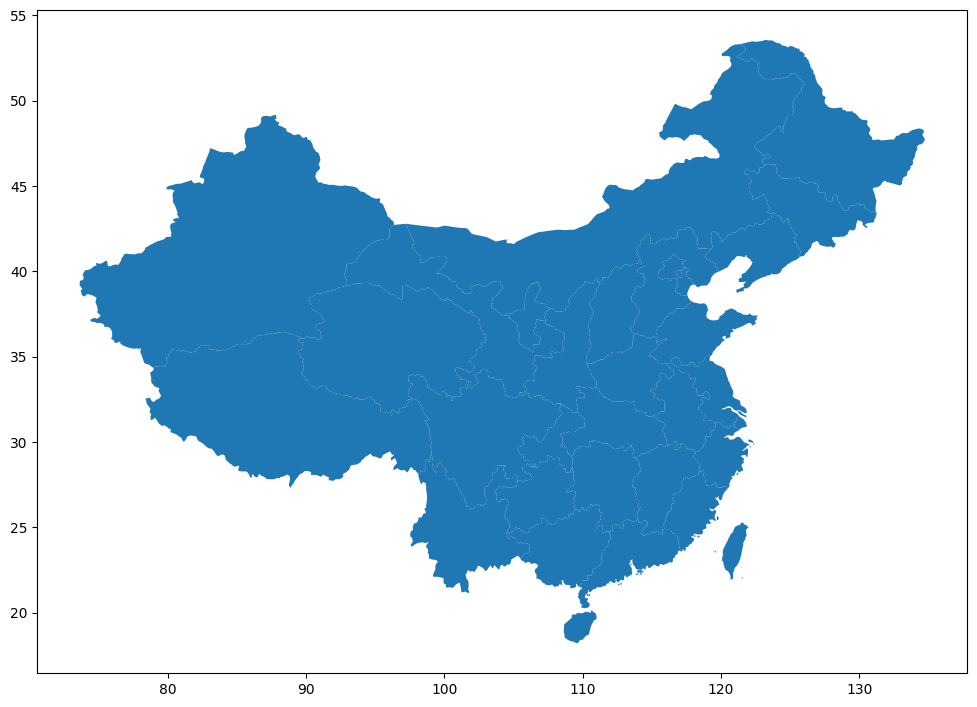

In [42]:
import pandas as pd

china = df[df.admin == "China"]
china_copy = pd.concat([china, china_sars], ignore_index=True)
# Combine the 'name_zh' columns
china_copy["name_zh"] = china_copy["name_zh"].combine_first(china_copy["name_zh_y"])
# Drop the extra 'name_zh_x' and 'name_zh_y' columns, if they exist
china_copy = china_copy.drop(["name_zh_x", "name_zh_y"], axis=1)
# Plotting the DataFrame
china_copy.plot(figsize=(12, 12))

Note [ISO-3166-2:CN](https://en.wikipedia.org/wiki/ISO_3166-2:CN) has updated subdivisions to use letters instead of numbers (e.g. `CN-91` -> `CN-HK`). We kept the numeric code for backward compatibility.

#### Finland

The Åland Islands (ISO country code AX) is an autonomous region of Finland, and carries the ISO-3166 code FI-01.

In [43]:
finland_aland = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Åland']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
finland_aland = finland_aland.merge(pd.DataFrame(
    data={
        "name_en": ["Åland"],
        "name_fi": ["Ahvenanmaan maakunta"],
        "iso_3166_2": ["FI-01"],
    },
), on="name_en", how="left")


<AxesSubplot: >

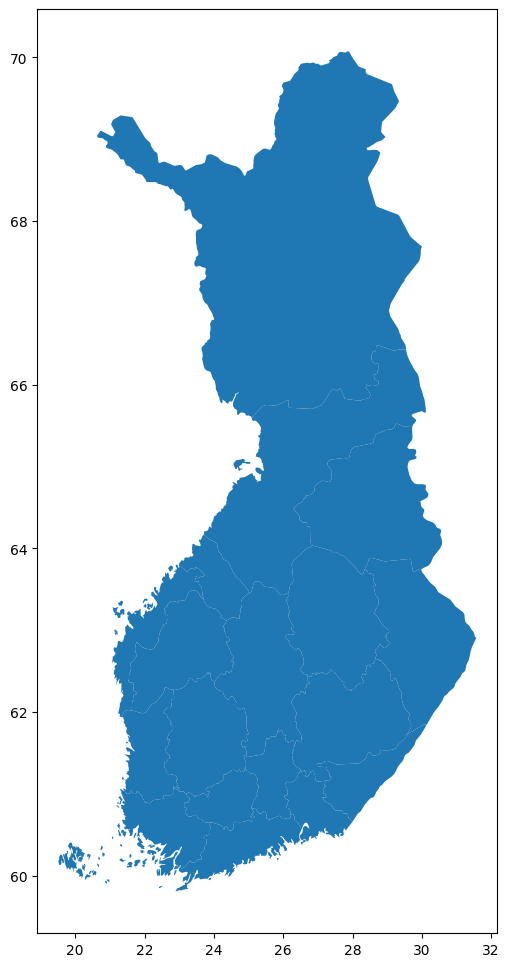

In [44]:
import pandas as pd

finland = df[df.admin == "Finland"]
# Concatenate the 'finland' DataFrame with 'finland_aland' DataFrame
finland_copy = pd.concat([finland, finland_aland], ignore_index=True)
# Combine 'name_fi' columns. However, since both columns are named 'name_fi', this might be redundant
# If you have two different columns for 'name_fi' values in each DataFrame, specify them as 'name_fi_x' and 'name_fi_y'
finland_copy["name_fi"] = finland_copy["name_fi"].combine_first(finland_copy["name_fi"])
# Drop the 'name_fi' column, if that's intended. This will remove the 'name_fi' data entirely.
# If you meant to drop other columns (like 'name_fi_x' and 'name_fi_y'), update the column names accordingly
finland_copy = finland_copy.drop(["name_fi"], axis=1)
# Plotting the DataFrame
finland_copy.plot(figsize=(12, 12))


#### Norway

Remove NO-X01~ (The uninhabited Bouvet Island) and move Svalbard closer to mainland

<AxesSubplot: >

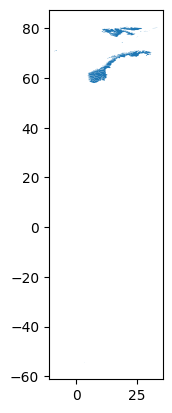

In [45]:
norway = df[df['adm0_a3'] == 'NOR']
norway.plot()

<AxesSubplot: >

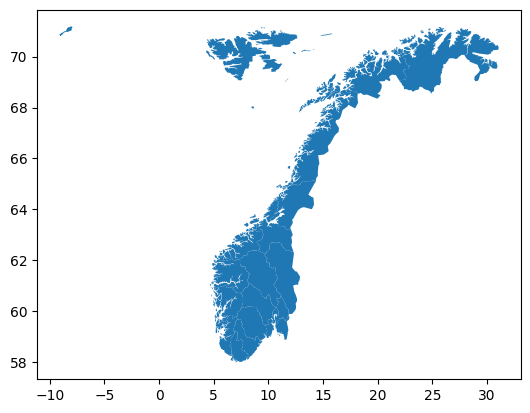

In [46]:
norway_copy = norway.copy()
norway_copy = norway_copy[norway_copy["iso_3166_2"] != "NO-X01~"]
reposition(norway_copy, norway.name == 'Svalbard', -12, -8, 0.5, 0.5)
#reposition(norway_copy, norway.name == 'Nordland', 10, 0, 2, 2)

norway_copy.plot()

#### Portugal

<AxesSubplot: >

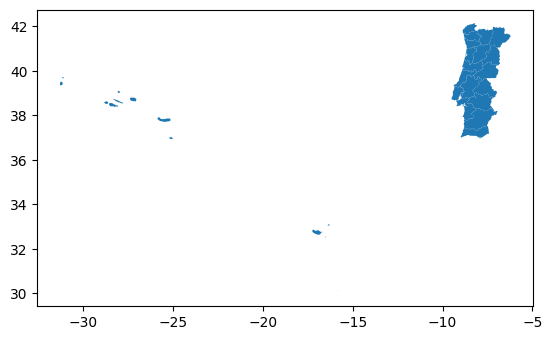

In [47]:
portugal = df[df.admin == 'Portugal']
portugal.plot()

<AxesSubplot: >

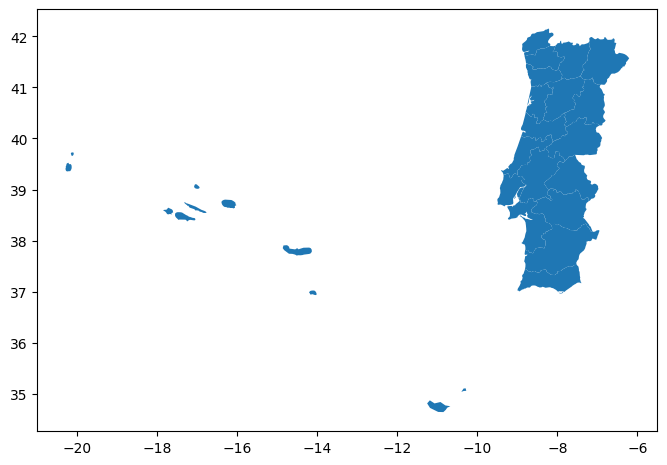

In [48]:
portugal_copy = portugal.copy()
reposition(portugal_copy, portugal.name == 'Azores', 11, 0)
reposition(portugal_copy, portugal.name == 'Madeira', 6, 2, simplify=0.015)
portugal_copy.plot(figsize=(8, 8))

#### Spain

<AxesSubplot: >

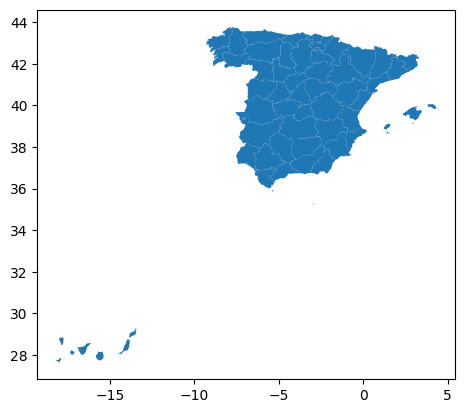

In [49]:
spain = df[df.admin == 'Spain']
spain.plot()

<AxesSubplot: >

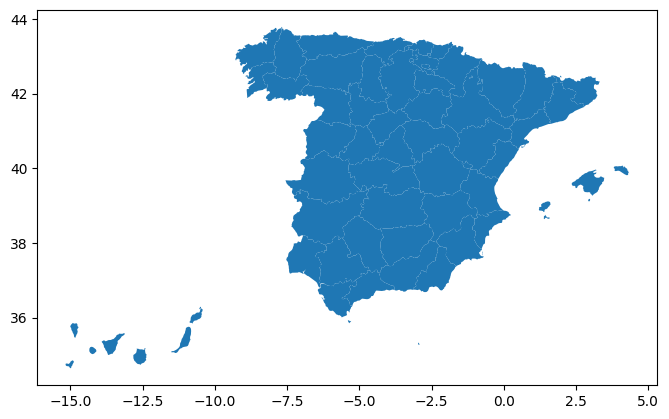

In [50]:
spain_copy = spain.copy()
reposition(spain_copy, spain.name.isin(['Las Palmas', 'Santa Cruz de Tenerife']), 3, 7, 1, 1)
spain_copy.plot(figsize=(8, 8))

#### Russia

<AxesSubplot: >

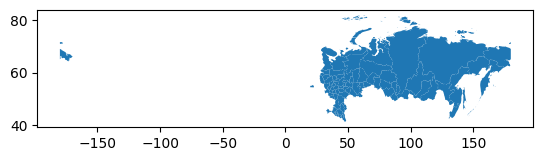

In [51]:
russia = df[df.admin == 'Russia']
russia.plot()

Russia looks off because of Chukchi runs across E180. We need to move the parts on the other side of the map to the right.

<AxesSubplot: >

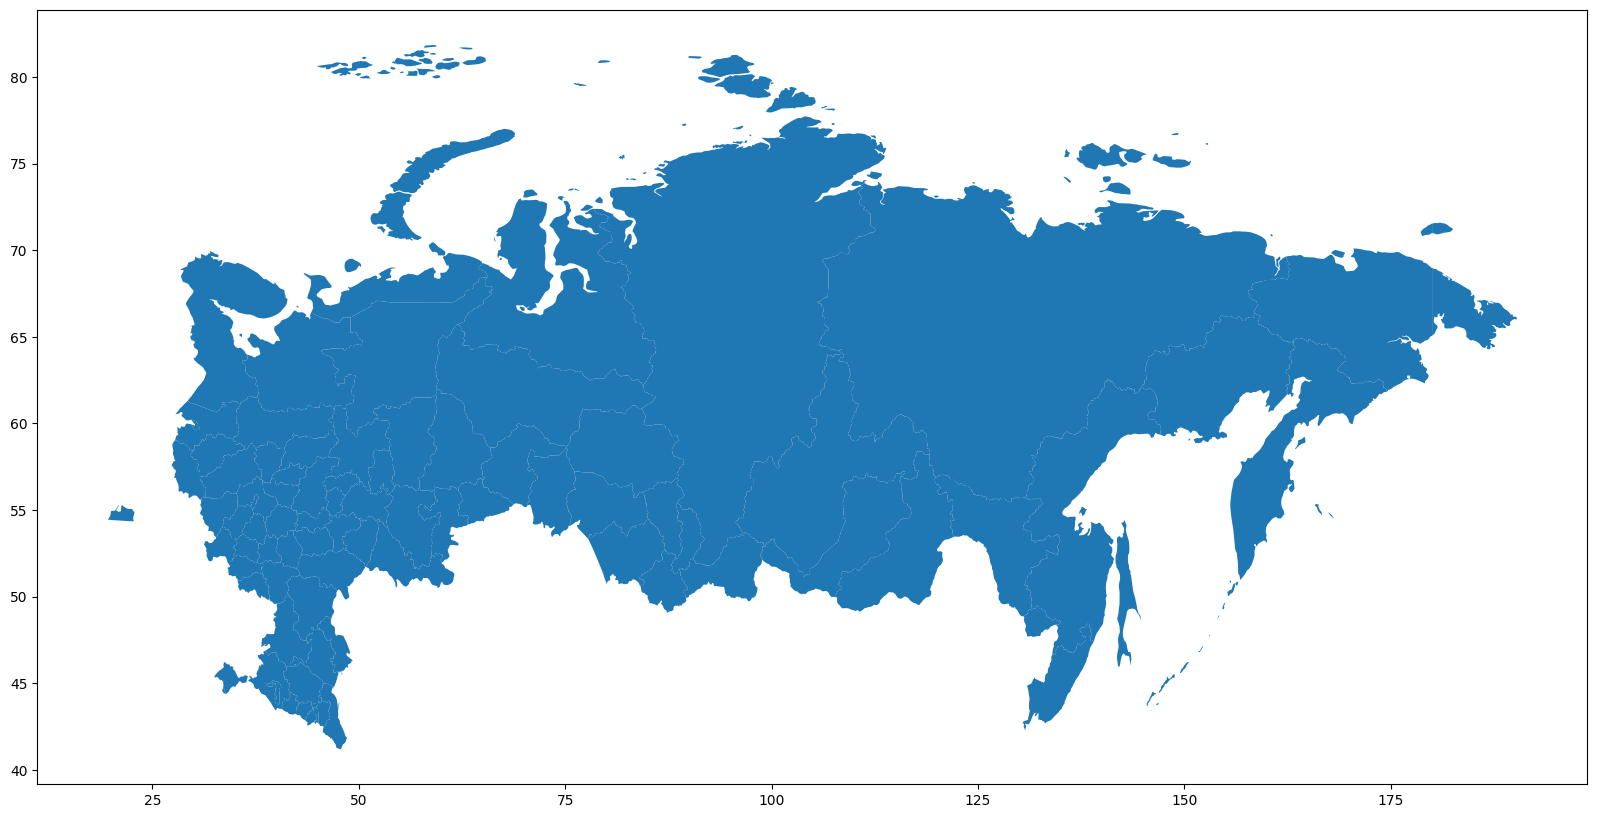

In [52]:
import shapely.geometry
import shapely.ops
import shapely.affinity

def shift_geom(geom, cutoff=0):
    border = shapely.geometry.LineString([(cutoff, -90), (cutoff, 90)])
    splitted_geom = shapely.ops.split(geom, border)

    # Create a list to store moved geometries
    moved_geom = []

    # Check if the split operation returned a GeometryCollection
    if isinstance(splitted_geom, shapely.geometry.GeometryCollection):
        # Iterate over each geometry in the GeometryCollection
        for item in splitted_geom.geoms:
            minx, miny, maxx, maxy = item.bounds
            if minx < cutoff:
                # Translate the geometry
                moved_geom.append(shapely.affinity.translate(item, xoff=360 - cutoff))
            else:
                moved_geom.append(item)
    else:
        # If the result is not a GeometryCollection, it means no split occurred
        moved_geom.append(geom)

    # Combine all moved geometries into a single geometry
    return shapely.ops.unary_union(moved_geom)

# Applying the function to the DataFrame
russia_copy = russia.copy()
russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
] = russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
].apply(shift_geom)

# Plotting
russia_copy.plot(figsize=(20, 20))


#### France

<AxesSubplot: >

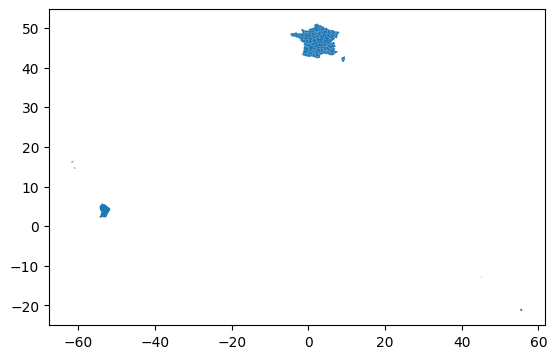

In [53]:
france = df[df.admin == 'France']
france.plot()

Ignore all the oversea islands

<AxesSubplot: >

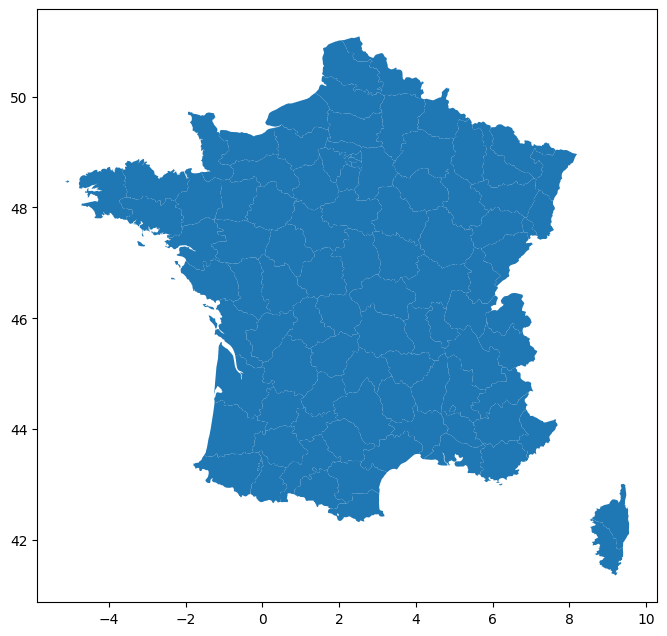

In [54]:
def apply_bounds(df, northwest, southeast):
    x1, y1 = northwest
    x2, y2 = southeast
    boundry = shapely.geometry.Polygon([(x1, y1),(x1, y2), (x2, y2), (x2, y1)])
    df = df.copy()
    return df[df.geometry.apply(lambda x: boundry.contains(x))]

france_copy = apply_bounds(france, (-20, 60), (20, 20))
france_copy.plot(figsize=(8, 8))

<AxesSubplot: >

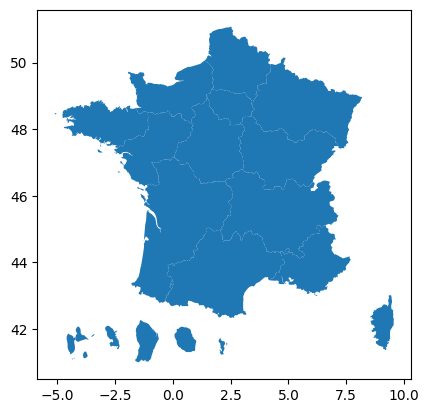

In [55]:
france_regions = france.copy()
# https://www.iso.org/obp/ui/#iso:code:3166:FR
dep_to_reg = {
    "FR-01": "FR-ARA",
    "FR-02": "FR-HDF",
    "FR-03": "FR-ARA",
    "FR-04": "FR-PAC",
    "FR-05": "FR-PAC",
    "FR-06": "FR-PAC",
    "FR-07": "FR-ARA",
    "FR-08": "FR-GES",
    "FR-09": "FR-OCC",
    "FR-10": "FR-GES",
    "FR-11": "FR-OCC",
    "FR-12": "FR-OCC",
    "FR-13": "FR-PAC",
    "FR-14": "FR-NOR",
    "FR-15": "FR-ARA",
    "FR-16": "FR-NAQ",
    "FR-17": "FR-NAQ",
    "FR-18": "FR-CVL",
    "FR-19": "FR-NAQ",
    "FR-21": "FR-BFC",
    "FR-22": "FR-BRE",
    "FR-23": "FR-NAQ",
    "FR-24": "FR-NAQ",
    "FR-25": "FR-BFC",
    "FR-26": "FR-ARA",
    "FR-27": "FR-NOR",
    "FR-28": "FR-CVL",
    "FR-29": "FR-BRE",
    "FR-2A": "FR-20R",
    "FR-2B": "FR-20R",
    "FR-30": "FR-OCC",
    "FR-31": "FR-OCC",
    "FR-32": "FR-OCC",
    "FR-33": "FR-NAQ",
    "FR-34": "FR-OCC",
    "FR-35": "FR-BRE",
    "FR-36": "FR-CVL",
    "FR-37": "FR-CVL",
    "FR-38": "FR-ARA",
    "FR-39": "FR-BFC",
    "FR-40": "FR-NAQ",
    "FR-41": "FR-CVL",
    "FR-42": "FR-ARA",
    "FR-43": "FR-ARA",
    "FR-44": "FR-PDL",
    "FR-45": "FR-CVL",
    "FR-46": "FR-OCC",
    "FR-47": "FR-NAQ",
    "FR-48": "FR-OCC",
    "FR-49": "FR-PDL",
    "FR-50": "FR-NOR",
    "FR-51": "FR-GES",
    "FR-52": "FR-GES",
    "FR-53": "FR-PDL",
    "FR-54": "FR-GES",
    "FR-55": "FR-GES",
    "FR-56": "FR-BRE",
    "FR-57": "FR-GES",
    "FR-58": "FR-BFC",
    "FR-59": "FR-HDF",
    "FR-60": "FR-HDF",
    "FR-61": "FR-NOR",
    "FR-62": "FR-HDF",
    "FR-63": "FR-ARA",
    "FR-64": "FR-NAQ",
    "FR-65": "FR-OCC",
    "FR-66": "FR-OCC",
    "FR-67": "FR-GES",
    "FR-68": "FR-GES",
    "FR-69": "FR-ARA",
    "FR-70": "FR-BFC",
    "FR-71": "FR-BFC",
    "FR-72": "FR-PDL",
    "FR-73": "FR-ARA",
    "FR-74": "FR-ARA",
    "FR-75": "FR-IDF",
    "FR-76": "FR-NOR",
    "FR-77": "FR-IDF",
    "FR-78": "FR-IDF",
    "FR-79": "FR-NAQ",
    "FR-80": "FR-HDF",
    "FR-81": "FR-OCC",
    "FR-82": "FR-OCC",
    "FR-83": "FR-PAC",
    "FR-84": "FR-PAC",
    "FR-85": "FR-PDL",
    "FR-86": "FR-NAQ",
    "FR-87": "FR-NAQ",
    "FR-88": "FR-GES",
    "FR-89": "FR-BFC",
    "FR-90": "FR-BFC",
    "FR-91": "FR-IDF",
    "FR-92": "FR-IDF",
    "FR-93": "FR-IDF",
    "FR-94": "FR-IDF",
    "FR-95": "FR-IDF",
    "FR-GF": "FR-GF",
    "FR-MQ": "FR-MQ",
    "FR-GP": "FR-GP",
    "FR-RE": "FR-RE",
    "FR-YT": "FR-YT",
}
france_regions["iso_3166_2_reg"] = france_regions['iso_3166_2'].apply(lambda x: dep_to_reg[x])
reposition(france_regions, france.name=='Guadeloupe', 57.4, 25.4, 1.5, 1.5)
reposition(france_regions, france.name=='Martinique', 58.4, 27.1, 1.5, 1.5)
reposition(france_regions, france.name=='Guyane française', 52, 37.7, 0.35, 0.35)
reposition(france_regions, france.name=='La Réunion', -55, 62.8, 1.5, 1.5)
reposition(france_regions, france.name=='Mayotte', -43, 54.3, 1.5, 1.5)
france_regions = france_regions.dissolve(by='iso_3166_2_reg')
france_regions['iso_3166_2'] = france_regions['iso_3166_2'].index
france_regions.plot()

#### Netherlands

<AxesSubplot: >

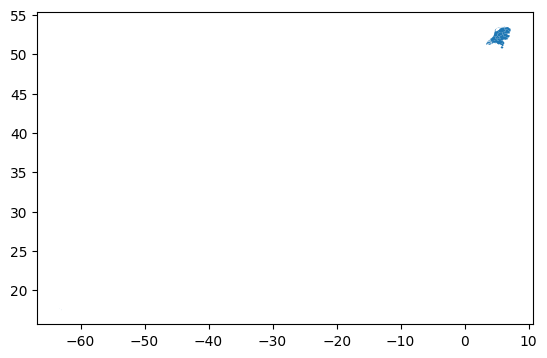

In [56]:
netherlands = df[df.admin == 'Netherlands']
netherlands.plot()

<AxesSubplot: >

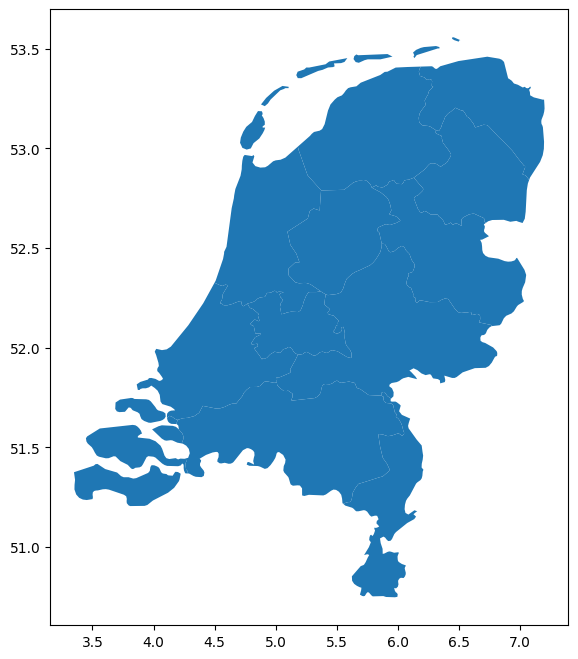

In [57]:
netherlands_copy = apply_bounds(netherlands, (-20, 60), (20, 20))
netherlands_copy.plot(figsize=(8, 8))

#### UK

<AxesSubplot: >

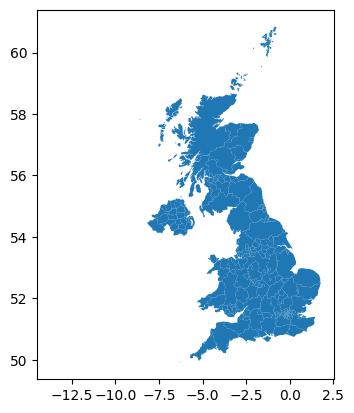

In [58]:
uk = df[df.admin == 'United Kingdom']
uk.plot()

<AxesSubplot: >

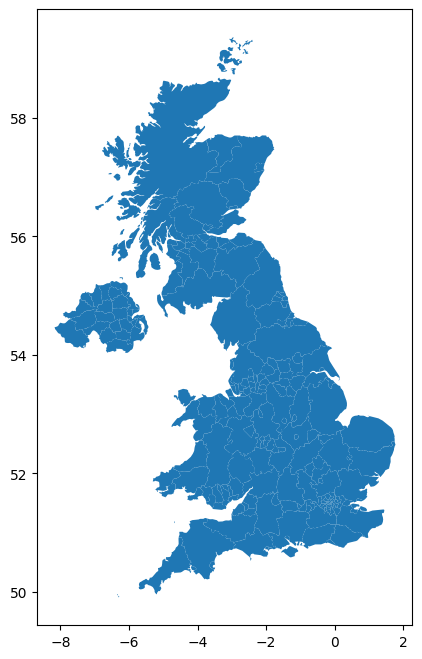

In [59]:
uk_copy = apply_bounds(uk, (-10, 60), (20, 20))
uk_copy.plot(figsize=(8, 8))

## Output GeoJSON

In [60]:
alt_maps = {
    "finland": finland_copy,
    "china": china_copy,
    "usa": usa_copy,
    "france": france_copy,
    "france_regions": france_regions,
    "netherlands": netherlands_copy,
    "norway": norway_copy,
    "uk": uk_copy,
    "russia": russia_copy,
    "spain": spain_copy,
    "portugal": portugal_copy,
}

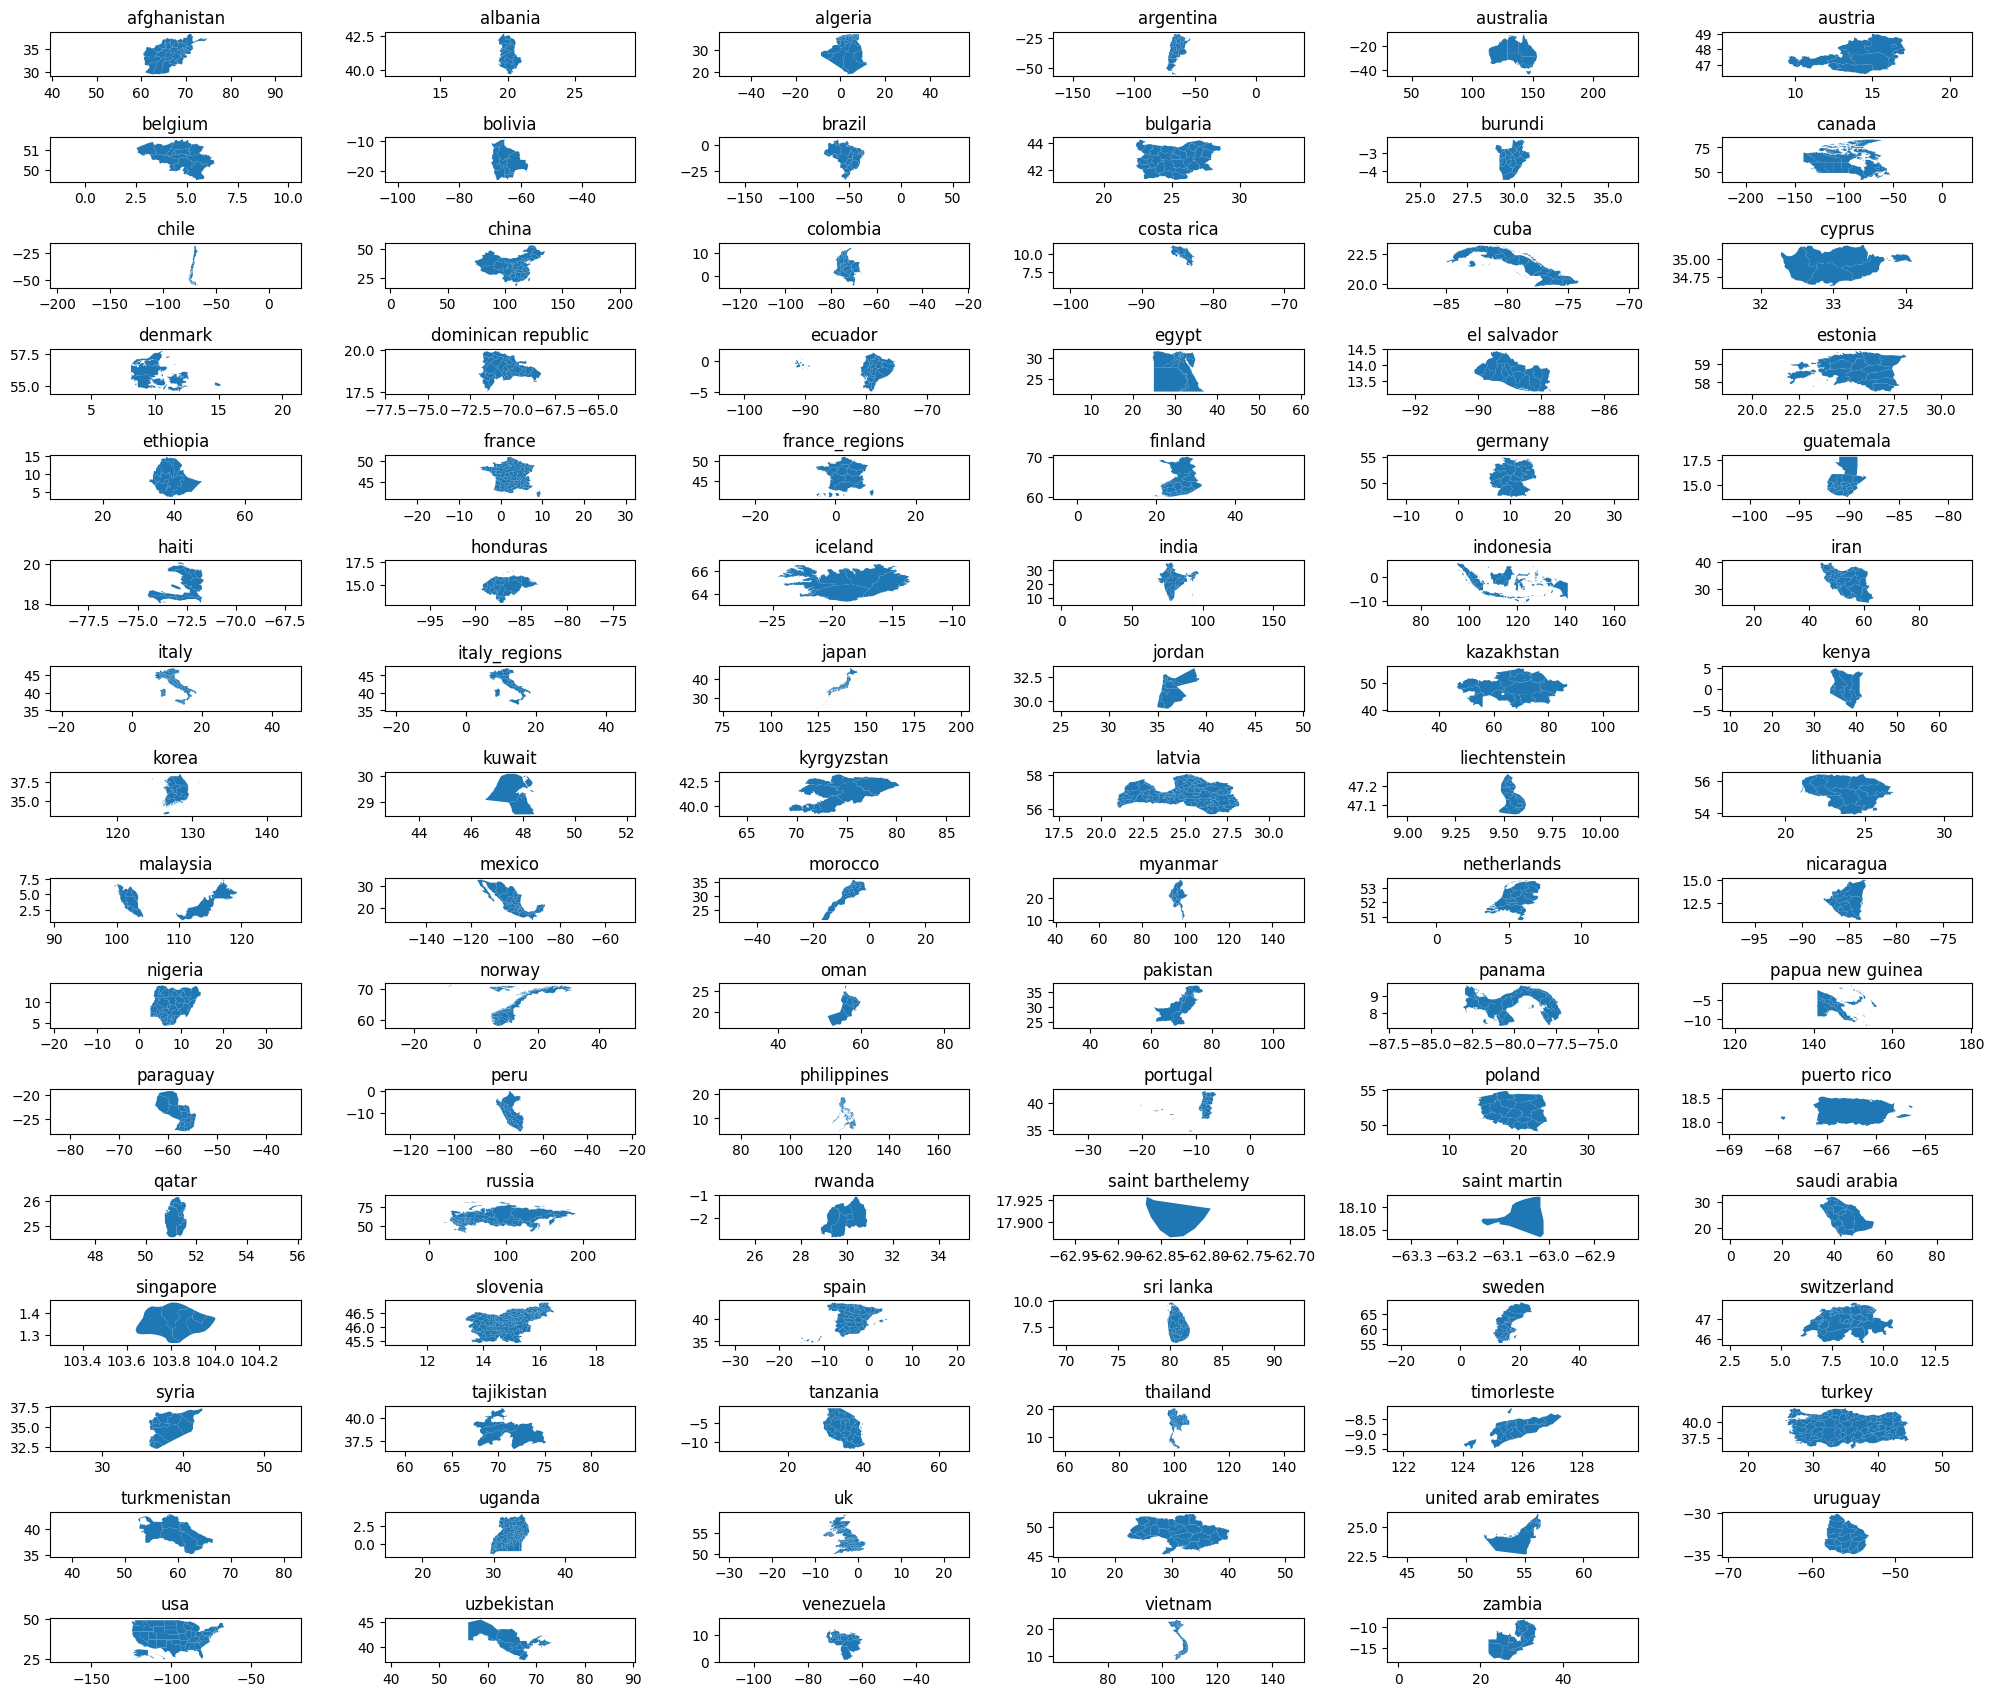

In [61]:
plot_all_countries()

In [62]:
import shutil

simplify_factors = {
    "uk": 0.005,
}
useful_columns = ["ISO", "NAME_1", "geometry"]

def get_simplify_factor_by_size(gdf):
    xmin, ymin, xmax, ymax = shapely.ops.unary_union(gdf["geometry"]).bounds
    size = (xmax - xmin) * (ymax - ymin)
    print("Size", round(size, 3), end="\t")
    if size > 1000: return 0.03
    if size > 300: return 0.02
    if size > 100: return 0.01
    return 0

def simplify_if_needed(country, gdf):
    """Simplify the maps based on country size"""
    country_alias = country_name_aliases.get(country, country)
    if country_alias in df_50m["admin"].str.lower().unique():
        return

    factor = simplify_factors.get(country) or get_simplify_factor_by_size(gdf)

    if factor:
        gdf["geometry"] = gdf.simplify(factor)

def save_geojson(country):
    if country in custom_countries:
        shutil.copy(f"../src/countries_custom/{country}.geojson", f"../src/countries/{country}.geojson")
    else:
        gdf = get_gdf(country)
        print(country, end="\t")
    
        # For backward compatibility
        gdf["ISO"] = gdf["iso_3166_2"]
        gdf["NAME_1"] = gdf["name"]
    
        simplify_if_needed(country, gdf)
    
        print(f'Saving geojson for {country}...')
        filename_country = country.replace(' ', '_')
        gdf[useful_columns].to_file(f"../src/countries/{filename_country}.geojson", driver="GeoJSON")

for country in countries:
    save_geojson(country)

print("Done.                          ")

afghanistan	Size 130.904	Saving geojson for afghanistan...
albania	Size 5.325	Saving geojson for albania...
algeria	Size 374.167	Saving geojson for algeria...
argentina	Size 662.347	Saving geojson for argentina...
australia	Saving geojson for australia...
austria	Size 20.068	Saving geojson for austria...
belgium	Size 7.709	Saving geojson for belgium...
bolivia	Size 161.264	Saving geojson for bolivia...
brazil	Saving geojson for brazil...
bulgaria	Size 18.715	Saving geojson for bulgaria...
burundi	Size 3.99	Saving geojson for burundi...
canada	Saving geojson for canada...
chile	Size 1652.977	Saving geojson for chile...
china	Saving geojson for china...
colombia	Size 264.526	Saving geojson for colombia...
costa rica	Size 25.939	Saving geojson for costa rica...
cuba	Size 37.185	Saving geojson for cuba...
cyprus	Size 1.05	Saving geojson for cyprus...
denmark	Size 22.461	Saving geojson for denmark...
dominican republic	Size 8.806	Saving geojson for dominican republic...
ecuador	Size 112.048

## Output Typescript

In [63]:
# Function to convert country name to a valid JavaScript identifier
def to_js_identifier(name):
    return name.replace(' ', '_').replace('-', '_')

# License boilerplate
license_boilerplate = """/*
 * Licensed to the Apache Software Foundation (ASF) under one
 * or more contributor license agreements.  See the NOTICE file
 * distributed with this work for additional information
 * regarding copyright ownership.  The ASF licenses this file
 * to you under the Apache License, Version 2.0 (the
 * "License"); you may not use this file except in compliance
 * with the License.  You may obtain a copy of the License at
 *
 *   http://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing,
 * software distributed under the License is distributed on an
 * "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
 * KIND, either express or implied.  See the License for the
 * specific language governing permissions and limitations
 * under the License.
 */
"""

# Generate TypeScript import statements
imports = "\n".join([f"import {to_js_identifier(country)} from './countries/{to_js_identifier(country)}.geojson';" for country in countries])

# Generate the export object
exports = "export const countries = {\n  " + ",\n  ".join([to_js_identifier(country) for country in countries]) + ",\n};"

# Additional exports
additional_exports = """
export const countryOptions = Object.keys(countries).map(x => {
  if (x === 'uk' || x === 'usa') {
    return [x, x.toUpperCase()];
  }
  if (x === 'italy_regions') {
    return [x, 'Italy (regions)'];
  }
  if (x === 'france_regions') {
    return [x, 'France (regions)'];
  }
  return [x, x.split('_').map((e) => e[0].toUpperCase() + e.slice(1)).join(' ')];
});

export default countries;
"""

# Combine license, imports, exports, and additional exports
typescript_code = f"{license_boilerplate}\n{imports}\n\n{exports}\n{additional_exports}"

# Write to a file
with open("../src/countries.ts", "w") as file:
    file.write(typescript_code)

print("TypeScript code written to src/countries.ts")

TypeScript code written to src/countries.ts


In [65]:
df = gpd.read_file('/Users/qleroy/75.gpkg')

<AxesSubplot: >

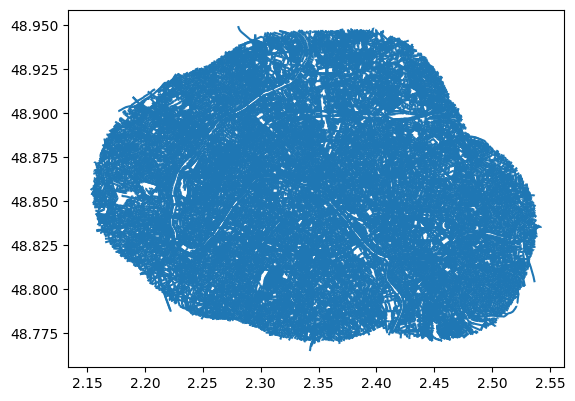

In [79]:
df.iloc[:, :].to_crs('EPSG:4326').plot()